# Problem Statement

Performing Exploratory Data Analysis on the dataset which consists of 3 months worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

We Start by doing some basic checks 
-  are there any data issues? 
- Does the data need to be cleaned?
- Gather some interesting overall insights about the data on what is the average transaction amount? 
- How many transactions do customers make each month, on average?
- Segmenting the dataset by transaction date and time. 
- Visualising transaction volume and spending over the course of an average day or week. 
- Consider the effect of any outliers that may distort our analysis.
– what insights can you draw from the location information provided in the dataset?

# Loading the dataset

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
data.shape

(12043, 23)

# Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
# checking for missing values in the main data
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

**1. Missing Values**

In [6]:
# Checking missing values we have in %

data.isnull().mean()*100

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
extraction            0.000000
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
dtype: float64

We have printed the percentage of the missing values for every column in our main dataset. We can directly drop the columns that have more than 50% of their values missing.

In [7]:
# Drop the columns with 50% or more missing values
data.drop(['bpay_biller_code', 'merchant_code'], axis=1, inplace=True)

data.isnull().sum()

status                  0
card_present_flag    4326
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

In [8]:
# First lets handle Categorical features which are missing
features_nan = [feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(data[feature].isnull().mean()*100,2)))

merchant_id: 35.92% missing values
merchant_suburb: 35.92% missing values
merchant_state: 35.92% missing values
merchant_long_lat: 35.92% missing values


In [9]:
# Replace missing value with a new label

def replace_cat_feature(dataset,features_nan):
    df=dataset.copy()
    df[features_nan]=df[features_nan].fillna('Missing')
    return df

data = replace_cat_feature(data, features_nan)

data[features_nan].isnull().sum()

merchant_id          0
merchant_suburb      0
merchant_state       0
merchant_long_lat    0
dtype: int64

In [10]:
# Now lets check for numerical variables the contains missing values
numerical_with_nan = [feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']

# We will print the numerical nan variables and percentage of missing values
for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(data[feature].isnull().mean()*100,2)))

card_present_flag: 35.92% missing value


In [11]:
data.card_present_flag.median()

1.0

In [12]:
data.card_present_flag.value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [13]:
median_value = data.card_present_flag.median()
data.card_present_flag.fillna(median_value,inplace=True)

data[numerical_with_nan].isnull().sum()

card_present_flag    0
dtype: int64

In [14]:
data.isnull().sum()

status               0
card_present_flag    0
account              0
currency             0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

**2. Distribution of Numerical variables**

In [15]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O' and feature != 'date']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  4


,card_present_flag,balance,age,amount
0,1.0,35.39,26,16.25
1,0.0,21.20,26,14.19
2,1.0,5.71,38,6.42
3,1.0,2117.22,40,40.90
4,1.0,17.95,26,3.25


In [16]:
# Numerical variables are usually of 2 type
# 1.Discrete Variables

discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [17]:
discrete_feature

['card_present_flag']

In [18]:
# 2.Continous variable 

continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


In [19]:
continuous_feature

['balance', 'age', 'amount']

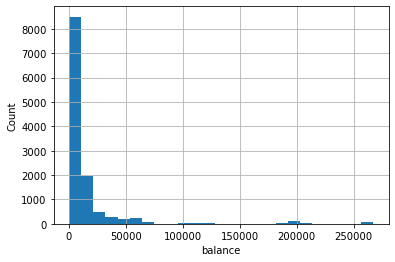

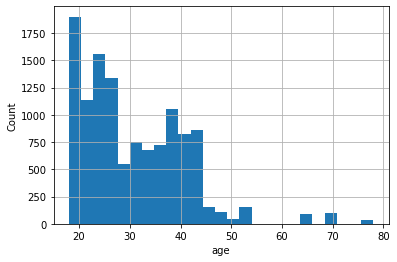

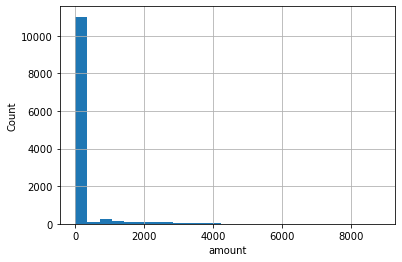

In [20]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    df=data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

**3. Outliers**

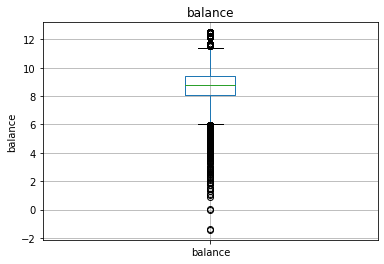

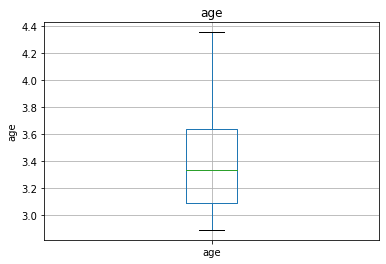

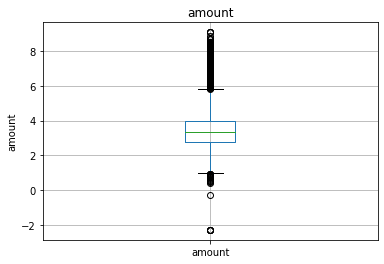

In [21]:
# for continuous features

for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**4. Categorical Variables**

In [22]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['status',
 'account',
 'currency',
 'long_lat',
 'txn_description',
 'merchant_id',
 'first_name',
 'gender',
 'merchant_suburb',
 'merchant_state',
 'extraction',
 'transaction_id',
 'country',
 'customer_id',
 'merchant_long_lat',
 'movement']

In [23]:
for feature in categorical_features:
    print(feature,':',len(data[feature].unique()))

status : 2
account : 100
currency : 1
long_lat : 100
txn_description : 6
merchant_id : 5726
first_name : 80
gender : 2
merchant_suburb : 1610
merchant_state : 9
extraction : 9442
transaction_id : 12043
country : 1
customer_id : 100
merchant_long_lat : 2704
movement : 2


We can see that there are columns which are not of any use such as country, currency these all have only one value so we can drop them.

In [24]:
data.drop(['currency', 'country'], axis=1, inplace=True)

In [25]:
data.shape

(12043, 19)

In [26]:
# analyzing the date column
data.date

0       2018-08-01
1       2018-08-01
2       2018-08-01
3       2018-08-01
4       2018-08-01
           ...    
12038   2018-10-31
12039   2018-10-31
12040   2018-10-31
12041   2018-10-31
12042   2018-10-31
Name: date, Length: 12043, dtype: datetime64[ns]

In [27]:
# lets create a column for weekday to find that how many transactions for each weekday has occured

import datetime as dt
data['weekday'] = data['date'].dt.day_name()

In [28]:
data.weekday.value_counts()

Friday       2073
Wednesday    2063
Thursday     1801
Saturday     1709
Sunday       1550
Tuesday      1487
Monday       1360
Name: weekday, dtype: int64

In [29]:
# lets create a column for month_name to find how many months are present and 
# to find that how many transactions for each month has occured

data['month_name'] = data['date'].dt.month_name()
data.month_name.value_counts()

October      4087
September    4013
August       3943
Name: month_name, dtype: int64

**Average Transaction for each month**

In [30]:
# Average transaction amount done for the month of August

aug = data[data["month_name"] == 'August']
print("Average transaction for August is :", aug.loc[:, 'amount'].mean())

Average transaction for August is : 185.12186659903654


In [31]:
# Average transaction amount done for the month of September

sep = data[data['month_name'] == "September"]
print("Average transaction of month September is :", sep.loc[:, 'amount'].mean())

Average transaction of month September is : 182.04590331422853


In [32]:
# Average transaction amount done for the month of October

oct = data[data['month_name'] == 'October']
print("Average transaction of month October is :", oct.loc[:, 'amount'].mean())

Average transaction of month October is : 196.42732321996542


**Maximum and Minimum Transaction for each month**

In [33]:
# Maximun & minimum transaction amount done for the month of August

print("Maximum Trancation in August Month is :", aug.loc[:, 'amount'].max())
print("Minimum Trancation in August Month is :", aug.loc[:, 'amount'].min())

Maximum Trancation in August Month is : 8835.98
Minimum Trancation in August Month is : 1.52


In [34]:
# Maximun & minimum transaction amount done for the month of September

print("Maximum Trancation in September Month is :", sep.loc[:, 'amount'].max())
print("Minimum Trancation in September Month is :", sep.loc[:, 'amount'].min())

Maximum Trancation in September Month is : 8835.98
Minimum Trancation in September Month is : 0.1


In [35]:
# Maximun & minimum transaction amount done for the month of October

print("Maximum Trancation in October Month is :", oct.loc[:, 'amount'].max())
print("Minimum Trancation in October Month is :", oct.loc[:, 'amount'].min())

Maximum Trancation in October Month is : 8835.98
Minimum Trancation in October Month is : 0.1


# Data Visualization

In [36]:
# Transaction Status

data['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

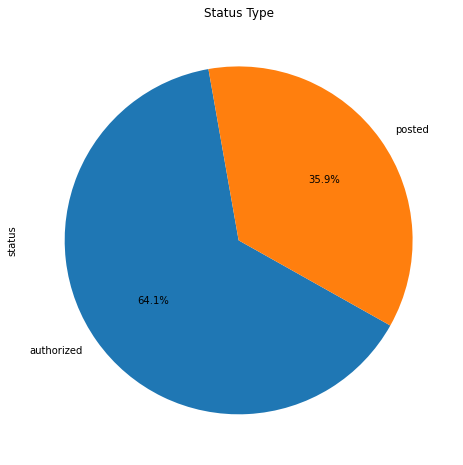

In [37]:
# Plot of transaction status

plt.figure(figsize=(8,8))
explode=(0.2,0)
data['status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=100)
plt.title('Status Type')
plt.show()

In [38]:
# With card payments

data['card_present_flag'].value_counts()

1.0    10520
0.0     1523
Name: card_present_flag, dtype: int64

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


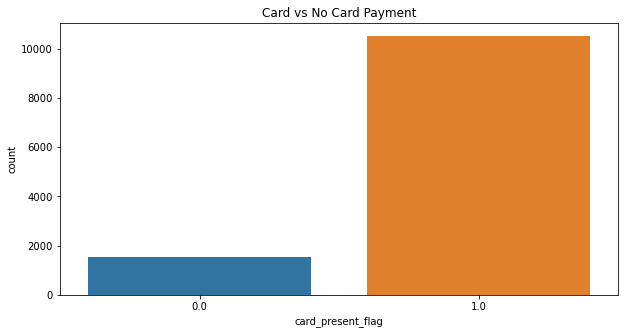

In [39]:
# Plot of with card payments

plt.figure(figsize=(10, 5))
sns.countplot(data['card_present_flag']).set(title = 'Card vs No Card Payment')
plt.show()

In [40]:
# types of transactions

data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


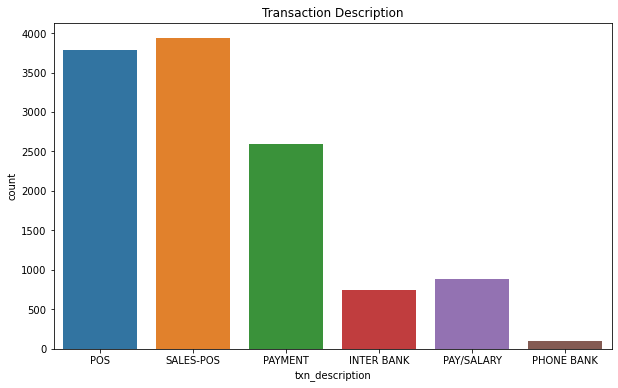

In [41]:
# Plot of types of transactions

plt.figure(figsize=(10, 6))
sns.countplot(data.txn_description).set(title = 'Transaction Description')
plt.show()

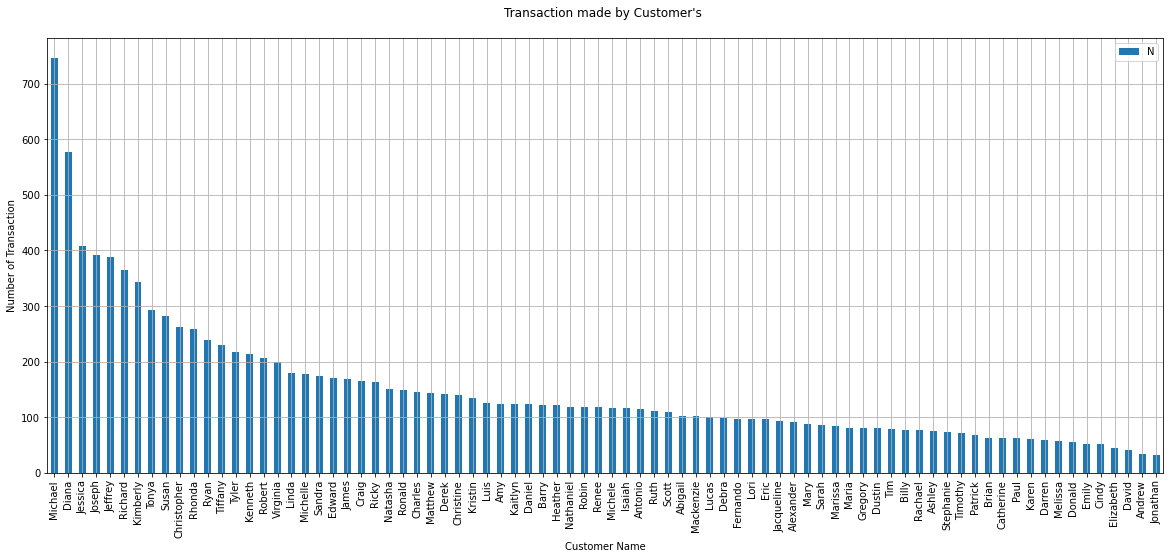

In [42]:
# Number of transaction made by each customer

plt.figure(figsize=(20,8))
data['first_name'].value_counts().plot.bar()
plt.title("Transaction made by Customer's \n")
plt.xlabel("Customer Name")
plt.xticks(rotation=90)
plt.grid(True)
plt.ylabel("Number of Transaction")
plt.legend('Name of Customer')
plt.show()

In [43]:
# Number of transaction made by top 10 customers

top_10_customers = data.first_name.value_counts(sort = True).head(10)
top_10_customers

Michael        746
Diana          578
Jessica        408
Joseph         391
Jeffrey        388
Richard        364
Kimberly       343
Tonya          292
Susan          282
Christopher    263
Name: first_name, dtype: int64

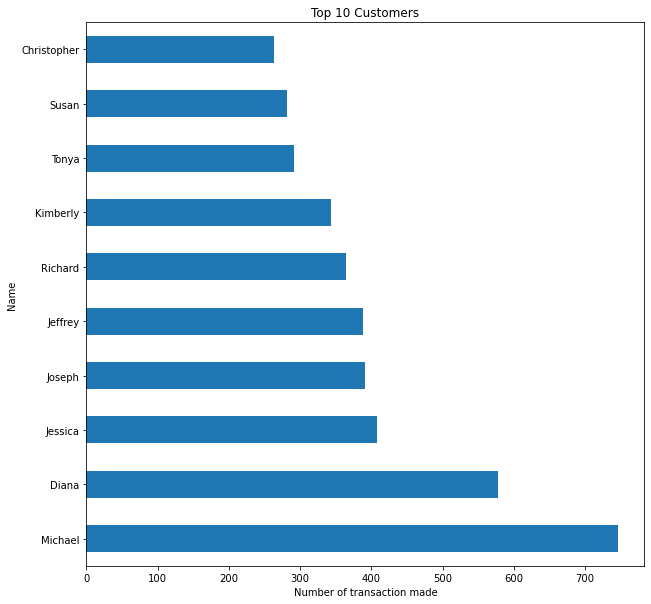

In [44]:
fig,ax = plt.subplots(figsize=(10,10)) 
top_10_customers.plot.barh()
ax.set(title="Top 10 Customers", xlabel="Number of transaction made", ylabel="Name")
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


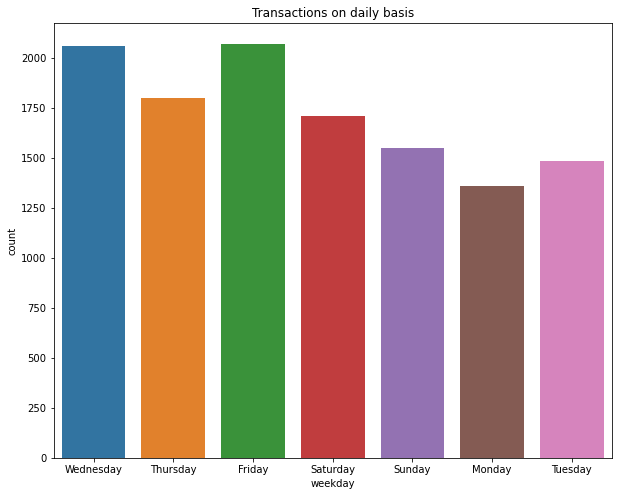

In [45]:
# transaction by weekdays

plt.figure(figsize=(10, 8))
sns.countplot(data.weekday).set(title ="Transactions on daily basis")
plt.show()

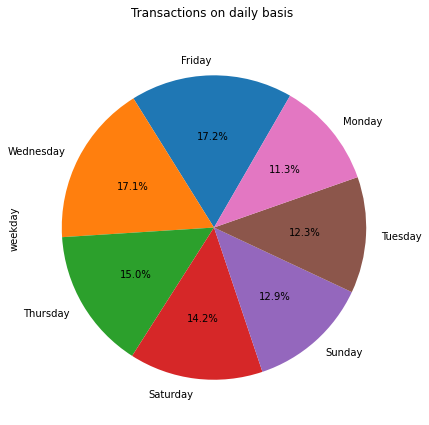

In [46]:
# transactions by weekdays with percentages

plt.figure(figsize=(7, 7))
data.weekday.value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title("Transactions on daily basis \n")
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


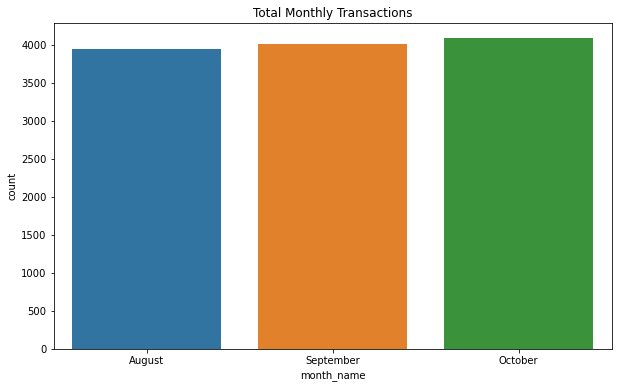

In [47]:
# Number of Transactions by each month

plt.figure(figsize=(10, 6))
sns.countplot(data.month_name).set(title = "Total Monthly Transactions")
plt.show()

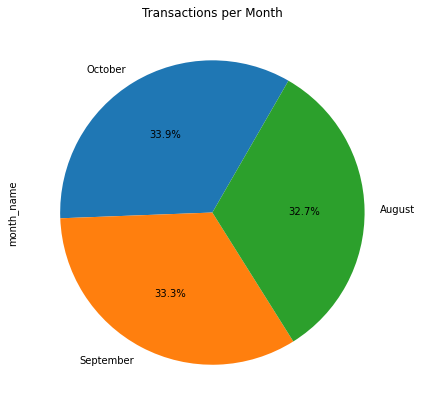

In [48]:
# Transactions by each month with percentage

plt.figure(figsize=(7, 7))
data['month_name'].value_counts().plot.pie(autopct='%1.1f%%',startangle=60)
plt.title('Transactions per Month')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


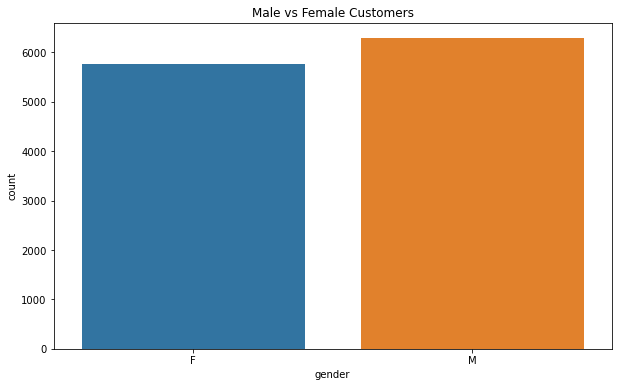

In [49]:
# Number of Male & female customers

plt.figure(figsize=(10, 6))
sns.countplot(data.gender).set(title = "Male vs Female Customers")
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


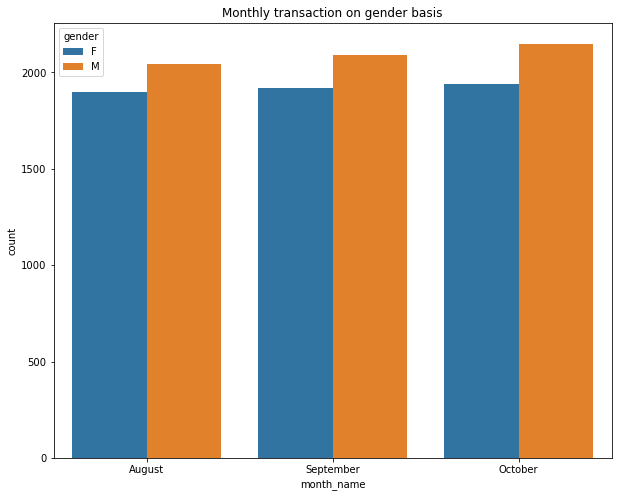

In [50]:
# Monthly transaction by gender

plt.figure(figsize=(10, 8))
sns.countplot(data.month_name, hue=data.gender).set(title = 'Monthly transaction on gender basis')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


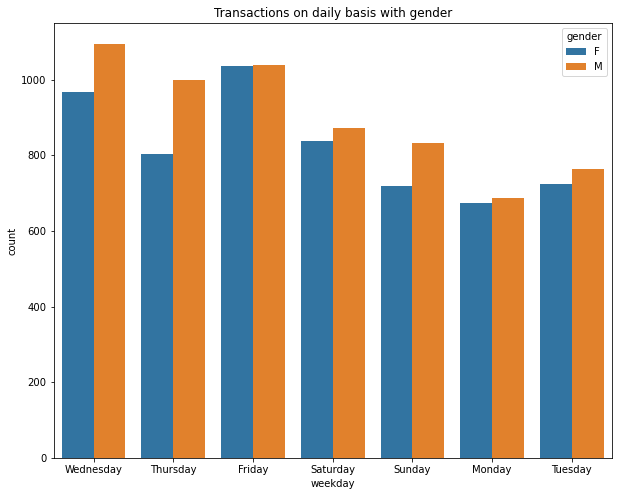

In [51]:
# Monthly transaction by weekdays with Gender

plt.figure(figsize=(10, 8))
sns.countplot(data.weekday, hue=data.gender).set(title='Transactions on daily basis with gender')
plt.show()

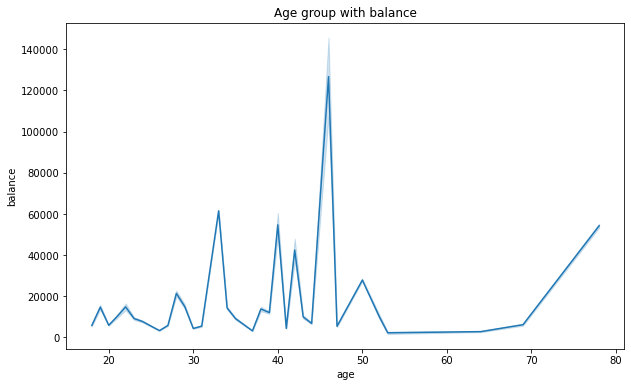

In [52]:
# Age Vs balance

plt.figure(figsize=(10, 6))
sns.lineplot(x ='age', y='balance', data=data).set(title = "Age group with balance")
plt.show()

In [53]:
# State Wise Transaction Count

data.merchant_state.value_counts()

Missing    4326
NSW        2169
VIC        2131
QLD        1556
WA         1100
SA          415
NT          205
ACT          73
TAS          68
Name: merchant_state, dtype: int64

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


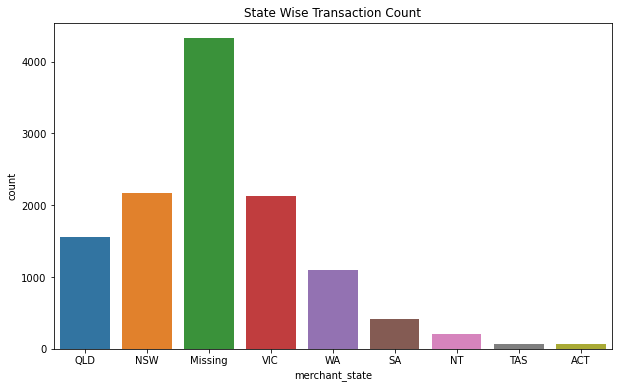

In [54]:
# Plot of State Wise Transaction Count

plt.figure(figsize=(10, 6))
sns.countplot(data.merchant_state).set(title ='State Wise Transaction Count')
plt.show()

In [55]:
# Movement type(Credit or Debit)

data.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

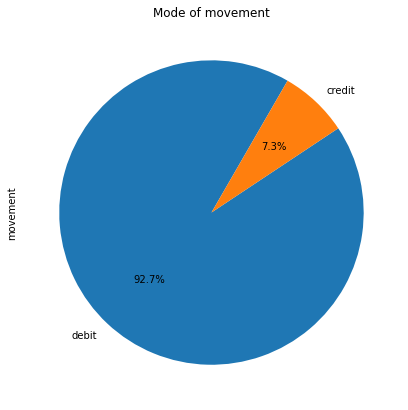

In [56]:
# Plot of Movement type(Credit or Debit)

plt.figure(figsize=(7, 7))
data['movement'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Mode of movement')
plt.show()

**Time Series Analysis**

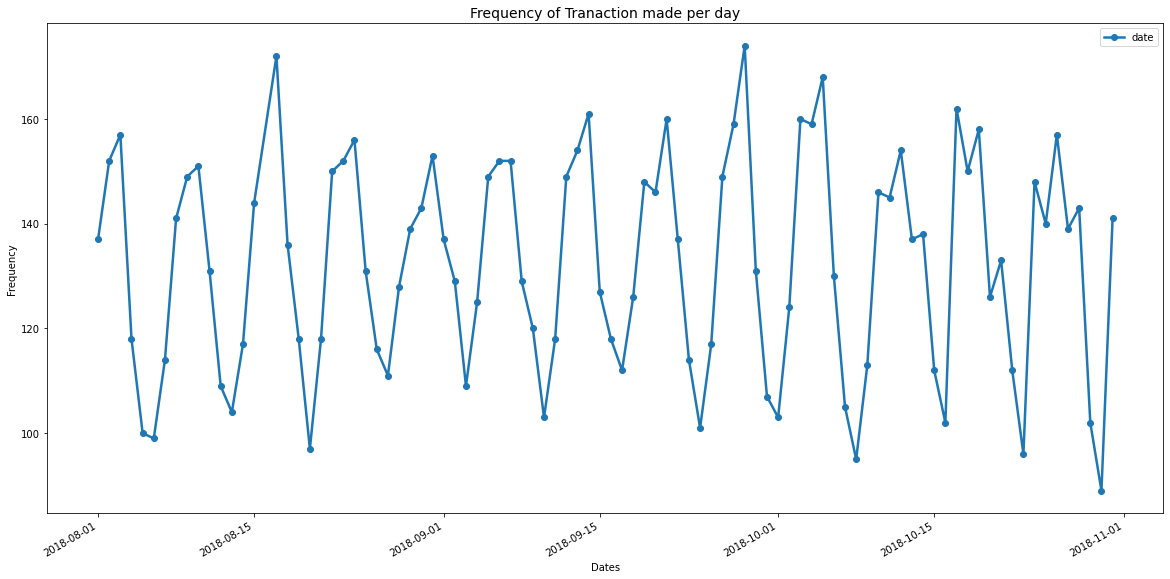

In [57]:
# Frequency of Tranaction made per day

data.date.value_counts(sort = True).plot(kind = 'line', linewidth = 2.5, linestyle = '-', marker = 'o', figsize = (20, 10))
plt.xlabel("Dates")
plt.ylabel("Frequency")
plt.title('Frequency of Tranaction made per day', fontdict={'fontsize':14})
plt.legend()
plt.show()

**Transaction Volume Each Day**

the avarage transaction processed each day in the duration of 3 month period.

In [58]:
data_date_count = data.groupby("date").count()
trans_vol = data_date_count["customer_id"].mean()
print("Average number of transactions each day :",trans_vol)
nPoints1 = len(data_date_count.index)

Average number of transactions each day : 132.34065934065933


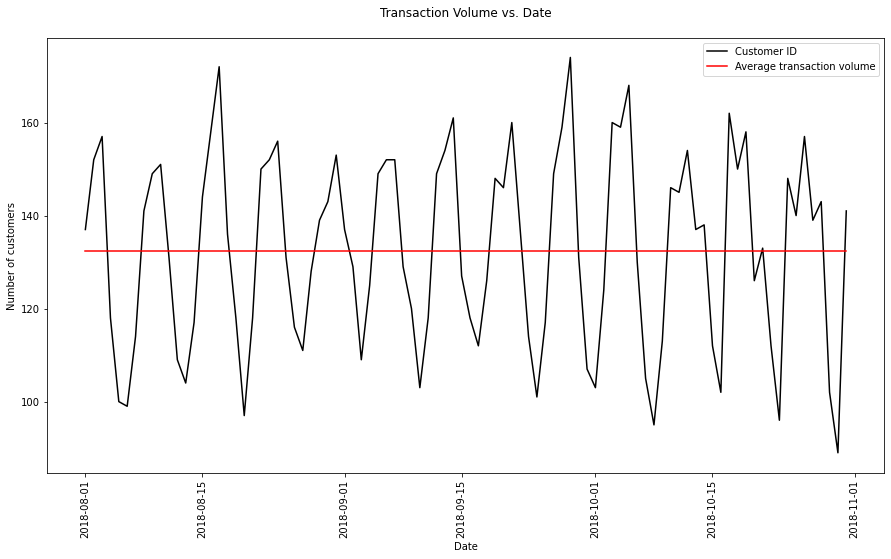

In [59]:
plt.figure(figsize=(15,8))
plt.plot(data_date_count.index, data_date_count["customer_id"], c="black", label = "Customer ID")
plt.plot(data_date_count.index, np.linspace(trans_vol,trans_vol,nPoints1), c="r", label = "Average transaction volume")
plt.title("Transaction Volume vs. Date\n")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Number of customers")
plt.legend()
plt.show()

**Average Transaction amount each day**

In [60]:
data_date_mean = data.groupby("date").mean()
trans_amt = data_date_mean["amount"].mean()
print("Average Transaction Amount is:",trans_amt)
nPoints2 = len(data_date_count.index)

Average Transaction Amount is: 190.61056774083968


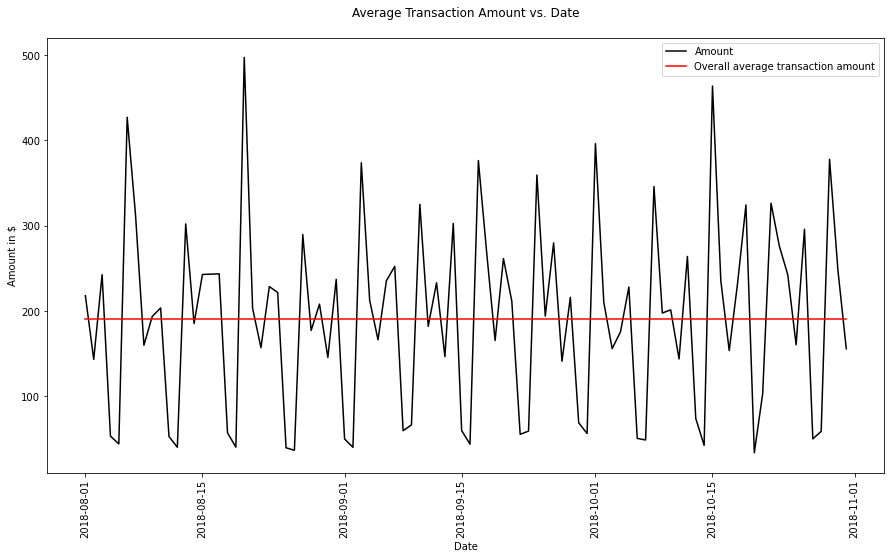

In [61]:
plt.figure(figsize=(15,8))
plt.plot(data_date_count.index, data_date_mean["amount"], c="black", label = "Amount")
plt.plot(data_date_count.index, np.linspace(trans_amt,trans_amt,nPoints2), c="r", label = "Overall average transaction amount")
plt.title("Average Transaction Amount vs. Date\n")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Amount in $")
plt.legend()
plt.show()

**Average Customer balance and amount by age**

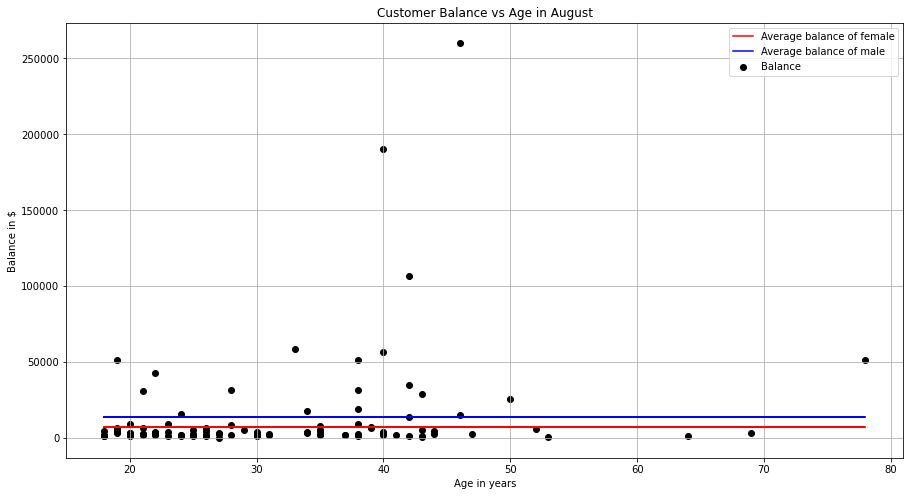

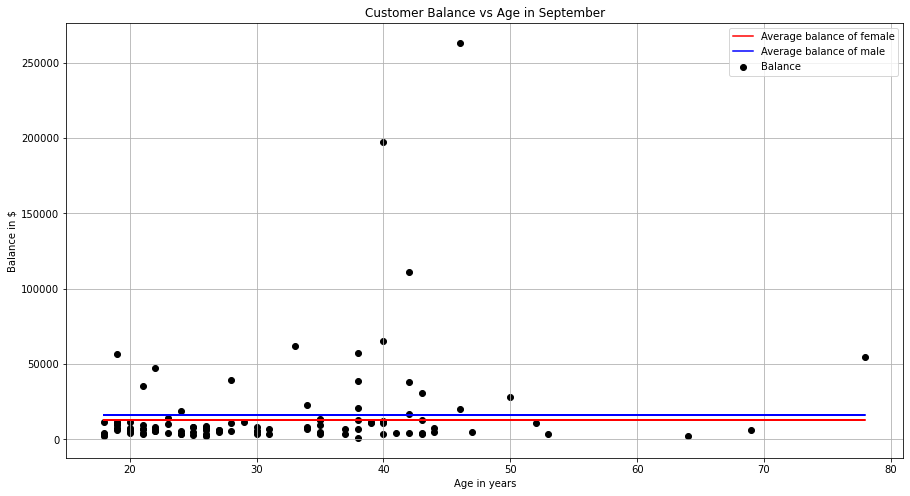

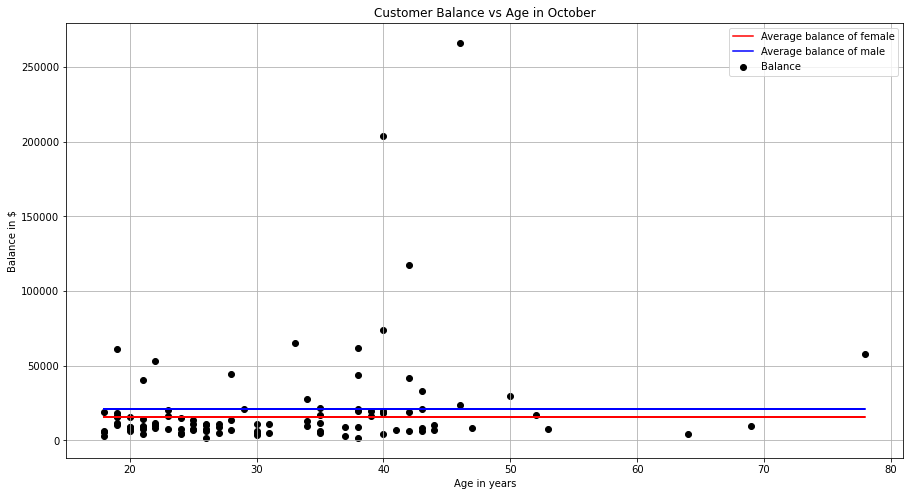

In [62]:
# Customer Balance

month=['August','September','October']

for m in month:
    data_cust = data[data["month_name"] == m].groupby("customer_id").mean()
    data_gen = data[data["month_name"] == m].groupby("gender").mean()

    mean_female_bal = data_gen["balance"].iloc[0]
    mean_male_bal = data_gen["balance"].iloc[1]
    nPoints=len(data_cust["age"])

    plt.figure(figsize=(15,8))
    plt.scatter(data_cust["age"], data_cust["balance"], c="black", label="Balance")
    plt.plot(data_cust["age"], np.linspace(mean_female_bal,mean_female_bal,nPoints), c="r", label = "Average balance of female")
    plt.plot(data_cust["age"], np.linspace(mean_male_bal,mean_male_bal,nPoints), c="b", label = "Average balance of male")
    plt.title("Customer Balance vs Age in {}".format(m))
    plt.xlabel("Age in years")
    plt.grid(True)
    plt.ylabel("Balance in $")
    plt.legend()
    plt.show()

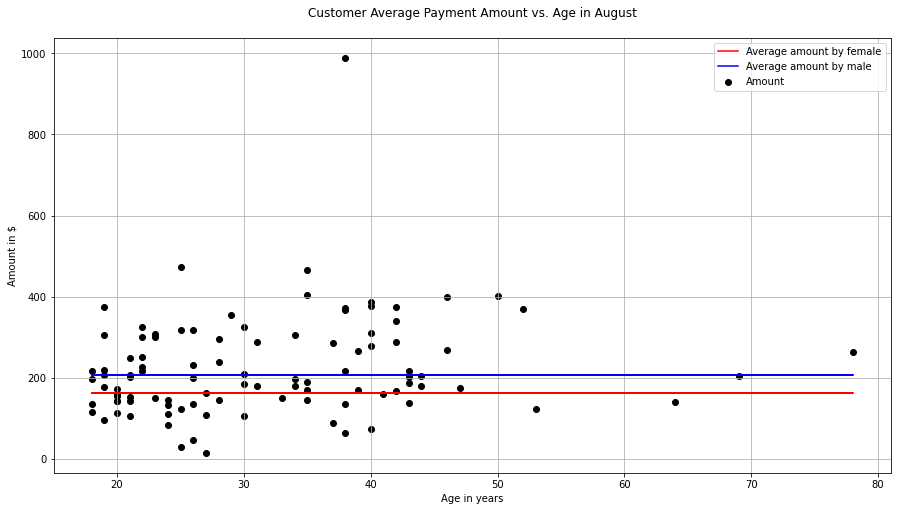

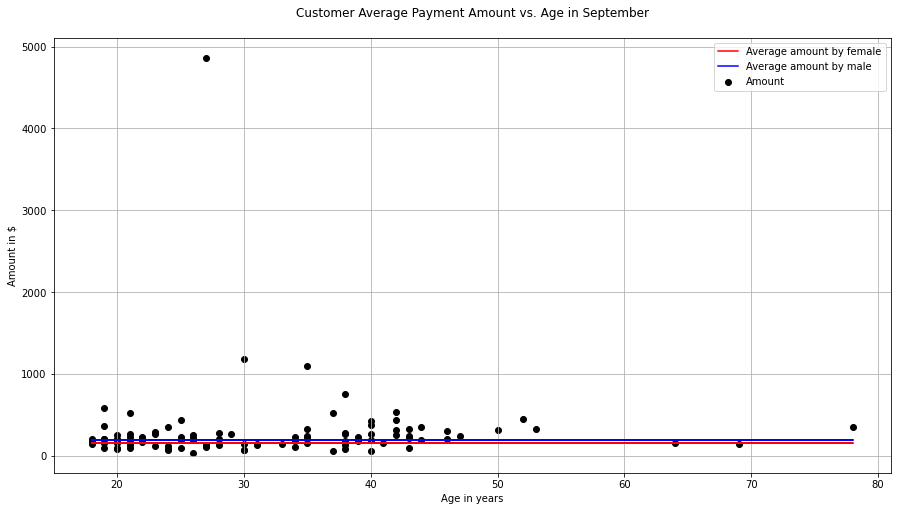

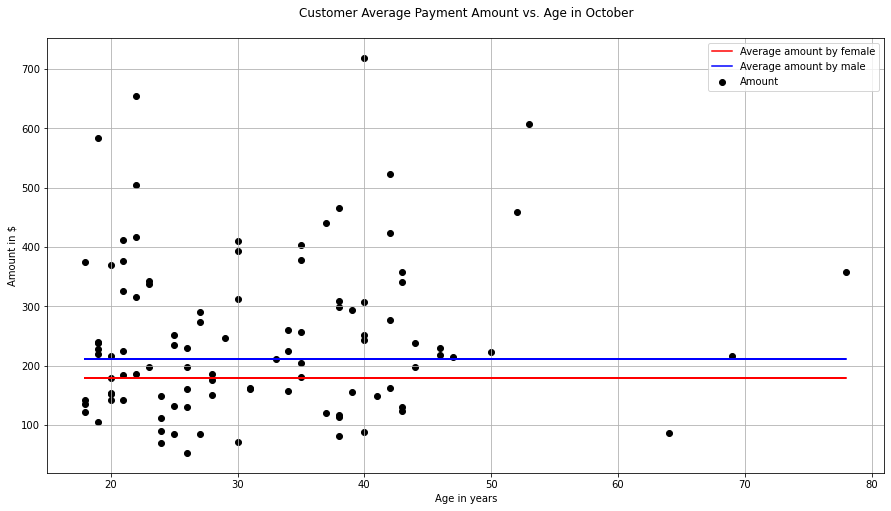

In [63]:
# Customer Average Payment Amount

for m in month:
    data_cust = data[data["month_name"] == m].groupby("customer_id").mean()
    data_gen = data[data["month_name"] == m].groupby("gender").mean()

    mean_female_amt = data_gen["amount"].iloc[0]
    mean_male_amt = data_gen["amount"].iloc[1]
    nPoints=len(data_cust["age"])

    plt.figure(figsize=(15,8))
    plt.scatter(data_cust["age"], data_cust["amount"], c="black", label="Amount")
    plt.plot(data_cust["age"], np.linspace(mean_female_amt,mean_female_amt,nPoints), c="r", label = "Average amount by female")
    plt.plot(data_cust["age"], np.linspace(mean_male_amt,mean_male_amt,nPoints), c="b", label = "Average amount by male")
    plt.title("Customer Average Payment Amount vs. Age in {}\n".format(m))
    plt.xlabel("Age in years")
    plt.ylabel("Amount in $")  
    plt.grid(True)
    plt.legend()

# Pickling

In [64]:
import os
import pickle

# Making directory processed_data
if not os.path.exists(os.path.join("..", "cleaned_data")):
    os.makedirs(os.path.join("..", "cleaned_data"))

# saving the data as a picke file in 'processed_data.pkl'  
PICKLE_DATA_DIR = os.path.join("..", "cleaned_data", "procesed_data.pkl")

pd.to_pickle(data, PICKLE_DATA_DIR)